In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset = pd.read_csv('logistic_regression.csv')
dataset.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

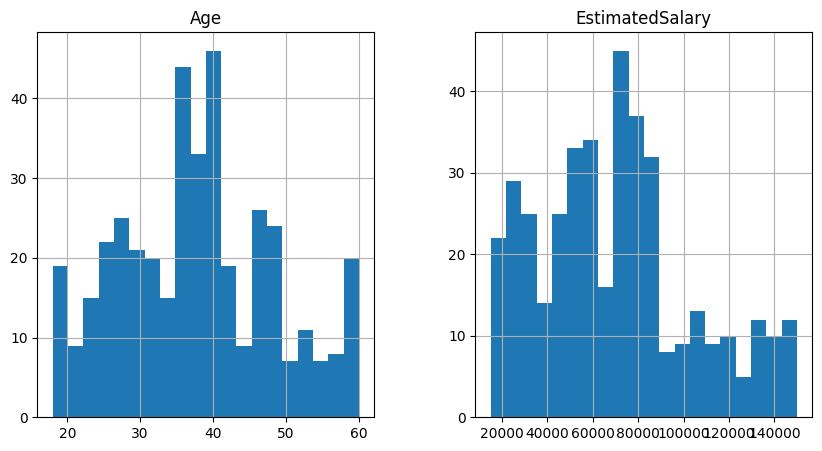

In [4]:
dataset[['Gender','Age', 'EstimatedSalary']].hist(bins=20, figsize=(10, 5))
plt.show()

In [5]:
X = dataset[['Gender', 'Age','EstimatedSalary']]
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})
y = dataset['Purchased']

<ipython-input-5-74af51bfa1ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [8]:
predictions = logistic.predict(X_test)

In [9]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        78
           1       0.93      0.64      0.76        42

    accuracy                           0.86       120
   macro avg       0.88      0.81      0.83       120
weighted avg       0.87      0.86      0.85       120



In [10]:
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))

Confusion Matrix
[[76  2]
 [15 27]]


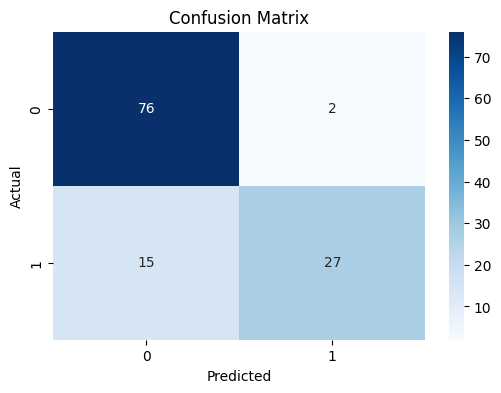

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

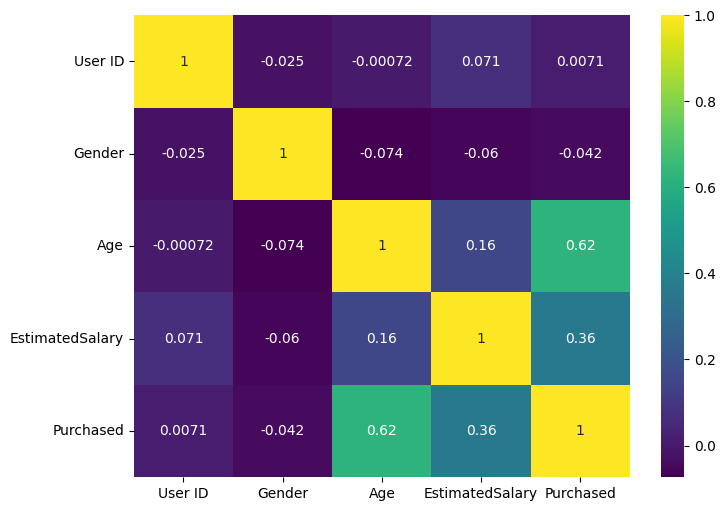

In [18]:
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(),annot=True,cmap='viridis')
plt.show()